In [1]:
print("test")

test


In [105]:
import requests
import pandas as pd
import xmltodict
import matplotlib.pyplot as plt
import folium
plt.rcParams['font.family'] = 'Malgun Gothic'

In [41]:

url = f"http://openAPI.seoul.go.kr:8088/44414e4b4f676f6537377557706e64/xml/ListRiverStageService/1/5/?KEY=String&TYPE=String&River_NAME=String"

response = requests.request("GET", url)

xml_data = response.text


In [ ]:


url = "http://openapi.seoul.go.kr:8088/44414e4b4f676f6537377557706e64/xml/ListRiverStageService/1/5/?KEY=String&TYPE=String&RIVER_NAME=String"

payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

In [42]:
parsed_data = xmltodict.parse(xml_data)

In [107]:
df = pd.read_csv("csv/서울시 하천 수위 현황 (1).csv", encoding="cp949")

df

,수위계코드,수위계명,하천명,구청코드,구청명,송신지 자료수집 시각,수신서버 저장 시각,실시간 하천 수위값(m),제방고(m),계획홍수위(m),하상고(m),통제수위(m)
0,101,여수대교,탄천,101,강남구,2023-12-07 03:45:10,2023-12-07 03:45:52,15.59,25.17,24.25,15.20,22.67
1,102,대곡교,탄천,101,강남구,2023-12-07 03:44:10,2023-12-07 03:45:52,11.88,20.09,18.01,10.76,0.00
2,103,탄천2교,탄천,101,강남구,2023-12-07 03:44:40,2023-12-07 03:45:52,5.99,21.43,18.01,4.41,0.00
3,301,모래말옆,방학천,103,도봉구,2023-12-07 03:44:10,2023-12-07 03:45:52,21.33,24.63,23.89,20.95,0.00
4,302,노원교,중랑천,103,도봉구,2023-12-07 03:44:11,2023-12-07 03:45:52,21.77,30.92,28.43,21.44,0.00
5,303,계성교,우이천,103,도봉구,2023-12-07 03:44:15,2023-12-07 03:45:52,28.94,33.19,32.81,29.39,0.00
6,401,장월교,우이천,104,노원구,2023-12-07 03:45:10,2023-12-07 03:45:52,15.45,20.20,20.12,15.20,0.00
7,402,신의교,중랑천,104,노원구,2023-12-07 03:45:10,2023-12-07 03:45:52,33.76,40.02,39.32,32.87,0.00
8,403,월계1교,중랑천,104,노원구,2023-12-07 03:45:11,2023-12-07 03:45:52,13.97,21.16,19.95,13.17,15.83
9,801,용두교,정릉천,108,동대문구,2023-12-07 03:45:10,2023-12-07 03:45:52,12.48,17.12,17.05,11.92,0.00


In [103]:
import matplotlib.cm as cm
import numpy as np

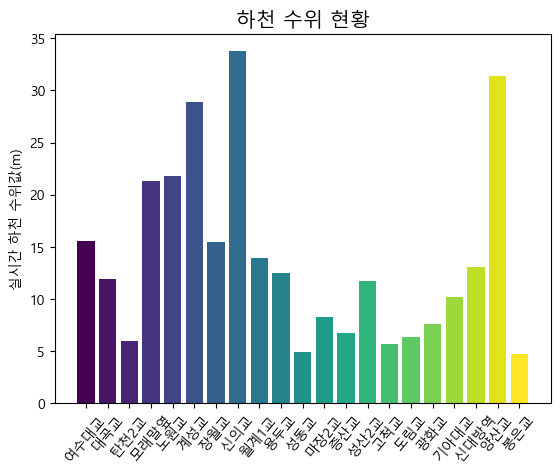

In [114]:
colors = cm.viridis(np.linspace(0, 1, len(df['수위계명'])))

plt.bar(df['수위계명'], df['실시간 하천 수위값(m)'], color=colors)
plt.xticks(df['수위계명'], rotation=50)

plt.ylabel('실시간 하천 수위값(m)')  # y축 라벨 추가
plt.title('하천 수위 현황', loc='center', size='x-large')
plt.show()

In [6]:
import folium
from folium.plugins import MarkerCluster, MiniMap
import json
import pandas as pd

# 서울 지역 GeoJSON 파일을 불러옵니다.
with open('C:\빅데이터기술사업화_프로젝트\JsonFile\seoul_municipalities_geo.json', encoding='utf-8') as f:
    seoul_geojson = json.load(f)

# 좌표가 있는 CSV 파일을 읽어옵니다.
file_path = 'C:\빅데이터기술사업화_프로젝트\minseok 2\minseok\sample_with_coordinates.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    print("Unable to read the file with 'utf-8' encoding.")
    df = None

# CSV 파일에서 평균 위도와 경도 값을 사용하여 지도를 초기화합니다.
init_lat = df['위도'].mean()
init_lon = df['경도'].mean()
seoul_map = folium.Map(location=[init_lat, init_lon], zoom_start=12)

# 서울 지역에 대한 스타일을 설정합니다. 서울 지역은 스타일을 적용하지 않습니다.
def style_function(feature):
    if feature['properties']['SIG_KOR_NM'] == 'Seoul':  # 'name'을 실제 속성 이름으로 교체하세요
        return {
            'fillOpacity': 0,  # 서울에 채우기 없음
            'color': 'transparent',  # 서울의 테두리 색 없음
            'weight': 0  # 서울의 테두리 두께 없음
        }
    else:
        return {
            'fillColor': '#grey',  # 다른 지역은 회색으로 채우기
            'color': 'grey',  # 다른 지역의 테두리 색도 회색
            'weight': 0.5,  # 다른 지역의 테두리 두께
            'fillOpacity': 0.2  # 다른 지역의 반투명도
        }

# 지도에 GeoJSON 레이어를 추가합니다.
folium.GeoJson(
    seoul_geojson,
    style_function=style_function
).add_to(seoul_map)

# 마커 클러스터를 생성하고 지도에 추가합니다.
marker_cluster = MarkerCluster().add_to(seoul_map)

# CSV 파일에서 데이터를 읽어와 각 행에 대한 마커를 추가합니다.
for index, row in df.iterrows():
    # 수용 안전 등급에 따라 마커 색상을 결정합니다.
    if row['CD_GUBUN'] == '안전':
        marker_color = 'green'
    elif row['CD_GUBUN'] == '위험':
        marker_color = 'red'
    else:
        marker_color = 'blue'  # 기본값 또는 다른 등급에 대한 색상

    # 팝업 메시지를 생성합니다.
    popup_message = f"- 수용 가능 등급: {row['CD_GUBUN']}"

    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup_message,
        tooltip=row['LOC_SFPR_A'],
        icon=folium.Icon(color=marker_color, icon='info-sign')
    ).add_to(marker_cluster)



# 미니맵을 추가합니다.
minimap = MiniMap()
seoul_map.add_child(minimap)

# 지도를 표시합니다.
seoul_map